In [1]:
import pandas as pd
import numpy as np
import folium
import skmob
import os

from gnact import utils, clust, plotting, network

In [9]:
os.chdir('/Users/patrickmaus/PycharmProjects/AIS_project/data')
df_posits = pd.read_csv('uid_positions.csv', parse_dates=['time'], usecols=['id', 'lat', 'lon', 'time', 'uid'])
list_uids = df_posits['uid'].unique()
sample_uids = list_uids[:10]
df_posits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16684332 entries, 0 to 16684331
Data columns (total 5 columns):
 #   Column  Dtype         
---  ------  -----         
 0   id      int64         
 1   uid     int64         
 2   time    datetime64[ns]
 3   lat     float64       
 4   lon     float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 636.5 MB


In [10]:
df_posits_sample = df_posits[df_posits['uid'].isin(sample_uids[np.array([2,4,5,6,9])])]
df_posits_sample.groupby('uid').agg('count')

,id,time,lat,lon
uid,,,,
316029000,18148,18148,18148,18148
366938780,31347,31347,31347,31347
366971350,22463,22463,22463,22463
366972020,20583,20583,20583,20583
367050550,13332,13332,13332,13332


In [11]:
#df_posits = clust.get_uid_posits(('636016432',), engine, end_time='2018-01-01')
#df_posits['uid'] = '636016432'
tdf = skmob.TrajDataFrame(df_posits_sample, latitude='lat', longitude='lon', datetime='time')
tdf.plot_trajectory(tiles='OpenStreetMap', zoom=4)

In [12]:
tdf.head()

,id,uid,datetime,lat,lng
2,5210194,316029000,2017-01-01,47.24418,-90.75447
4,5210206,367050550,2017-01-01,46.69738,-92.01868
5,7810570,366972020,2017-01-01,47.12975,-86.26490
6,7811042,366971350,2017-01-01,46.39301,-84.23461
9,9733155,366938780,2017-01-01,45.66910,-83.61559


In [14]:
from skmob.preprocessing import detection, clustering
stdf = detection.stops(tdf, minutes_for_a_stop=360, spatial_radius_km=2, leaving_time=True, 
                       no_data_for_minutes=10000)

print('Points of the original trajectory:\t%s'%len(tdf))
print('Points of stops:\t\t\t%s'%len(stdf))



Points of the original trajectory:	105873
Points of stops:			32


In [15]:
m = stdf.plot_trajectory(max_users=10, start_end_markers=True, tiles='OpenStreetMap', zoom=4)
stdf.plot_stops(max_users=10, map_f=m)

In [16]:
stdf.head()

,id,uid,datetime,lat,lng,leaving_datetime
0,10112040,316029000,2017-01-04 02:06:19,42.782080,-80.07693,2017-01-04 11:09:05
1,8279664,316029000,2017-01-07 09:45:26,47.926210,-85.91388,2017-01-07 18:06:46
2,5853170,316029000,2017-01-08 14:45:16,46.750125,-92.13287,2017-01-09 02:17:17
3,8428048,316029000,2017-01-09 20:05:58,48.608440,-87.78308,2017-01-10 05:50:48
4,8531250,316029000,2017-01-10 21:04:57,46.460480,-84.57375,2017-01-11 12:33:50


In [17]:
# look at a single UID

In [18]:
m = stdf[stdf['uid']==366938780].plot_trajectory(start_end_markers=True, 
                          tiles='OpenStreetMap', zoom=4)
stdf[stdf['uid']==366938780].plot_stops(max_users=10, map_f=m)

In [19]:
cstdf = clustering.cluster(stdf, cluster_radius_km=1, min_samples=1)

print(len(cstdf.cluster.unique()))
cstdf.head()

8


,id,uid,datetime,lat,lng,leaving_datetime,cluster
0,10112040,316029000,2017-01-04 02:06:19,42.782080,-80.07693,2017-01-04 11:09:05,0
1,8279664,316029000,2017-01-07 09:45:26,47.926210,-85.91388,2017-01-07 18:06:46,7
2,5853170,316029000,2017-01-08 14:45:16,46.750125,-92.13287,2017-01-09 02:17:17,6
3,8428048,316029000,2017-01-09 20:05:58,48.608440,-87.78308,2017-01-10 05:50:48,5
4,8531250,316029000,2017-01-10 21:04:57,46.460480,-84.57375,2017-01-11 12:33:50,4


<AxesSubplot:title={'center':'user 366938780'}>

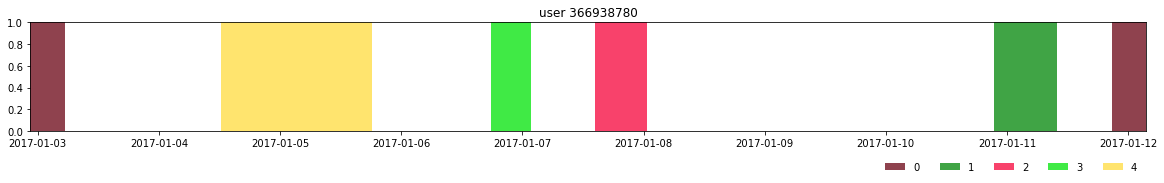

In [20]:
cstdf.plot_diary(user=366938780, legend=True)

In [21]:
df_posits_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105873 entries, 2 to 14050662
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   id      105873 non-null  int64         
 1   uid     105873 non-null  int64         
 2   time    105873 non-null  datetime64[ns]
 3   lat     105873 non-null  float64       
 4   lon     105873 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 4.8 MB


In [ ]:
# execute clustering algo with hyperparameters
df_clusts = clust.calc_clusts(df_posits_sample[df_posits_sample['uid']==366938780], 
                              eps_km=1, min_samp=10, method='optics')
df_centers = clust.calc_centers(df_clusts)
plotting.plot_clusters(df_posits, df_centers)


/Users/patrickmaus/PycharmProjects/gnact/clust.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[time] = df[time].dt.floor('min').copy()
/Users/patrickmaus/anaconda3/envs/gnact_test_loose/lib/python3.8/site-packages/sklearn/cluster/_optics.py:803: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Plotted 274 total clusters.


In [ ]:
df_posits_sample[df_posits_sample['uid']==366938780]

In [ ]:
# network plot

In [ ]:
cstdf

In [ ]:
# sample

In [ ]:
import skmob
from skmob.preprocessing import detection, clustering
import pandas as pd
# read the trajectory data (GeoLife, Beijing, China)
url = skmob.utils.constants.GEOLIFE_SAMPLE
df = pd.read_csv(url, sep=',', compression='gzip')
tdf = skmob.TrajDataFrame(df, latitude='lat', longitude='lon', user_id='user', datetime='datetime')
print(tdf.head())

In [ ]:
# detect stops
stdf = detection.stops(tdf, stop_radius_factor=0.5, minutes_for_a_stop=20.0, spatial_radius_km=0.2, leaving_time=True)
print(stdf.head())

In [ ]:
m = stdf.plot_trajectory(max_users=10, start_end_markers=True, tiles='OpenStreetMap', zoom=4)
stdf.plot_stops(max_users=10, map_f=m)

In [ ]:
# cluster stops
cstdf = clustering.cluster(stdf, cluster_radius_km=1, min_samples=1)
print(cstdf)
print(len(cstdf.cluster.unique()))

In [ ]:
# plot the diary of one individual
user = 1
start_datetime = pd.to_datetime('2008-10-23 030000')
end_datetime = pd.to_datetime('2008-10-30 030000')
ax = cstdf.plot_diary(user, start_datetime=start_datetime, end_datetime=end_datetime)